#### Library Imports:
In this section, we set up the necessary libraries for image processing and machine learning using TensorFlow and Keras.

In [2]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread

#### Importing VGG16 and Model Components:
These components will be used to construct and train a custom model tailored to our specific image-related task.

In [3]:
from keras.applications import VGG16
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, Flatten, Activation, Input
from keras.optimizers import Adam, Adamax


### Dataset and Directory Setup

In this section, we set up the paths for our dataset and various directories related to training and testing.

These directory paths are essential for loading and organizing the dataset for further processing and model training.

In [5]:

current_directory = "C:/Users/Dell/Desktop/Image Classification"

# Define the relative path to the dataset directory
DATASET_DIR = os.path.join(current_directory, 'dataset')
TRAIN_DIR = os.path.join(current_directory, 'train_data')
TEST_DIR = os.path.join(current_directory, 'test_data')
train_cat = os.path.join(TRAIN_DIR, 'cat')
train_dog = os.path.join(TRAIN_DIR, 'dog')

### Constants for Image Processing and Model Training

In this section, we define constants that are crucial for image processing and training our machine learning model.


In [6]:
# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
IMAGE_SHAPE = (224, 224, 3)

### Data Generators for Image Preprocessing

In this section, we create data generators to preprocess and augment the training and testing images.

In [7]:
# Create data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = IMAGE_SIZE , 
    class_mode = 'binary' ,
    shuffle = True , 
    batch_size = BATCH_SIZE)
test_generator = test_datagen.flow_from_directory(TEST_DIR , 
    target_size = IMAGE_SIZE , 
    class_mode = 'binary' ,
    shuffle = True , 
    batch_size = BATCH_SIZE)

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


['cat', 'dog']


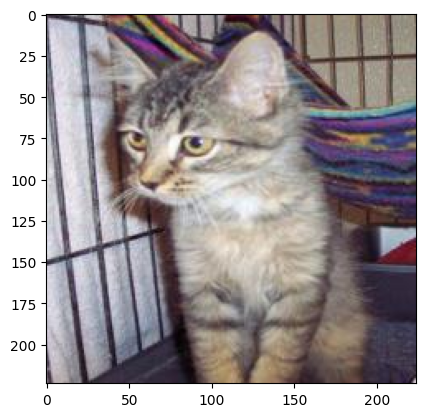

In [11]:
print(os.listdir(TRAIN_DIR))
para_cell = train_cat + "\\cat.2.jpg"
plt.imshow(imread(para_cell))

### Model Construction and Compilation

In this section, we build and compile a custom model for binary classification using a pre-trained VGG16 base model.


In [9]:
# Use VGG16 as the base model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=IMAGE_SHAPE, pooling='max')
base_model.trainable = False

# Create a custom model
input_layer = Input(shape=IMAGE_SHAPE)
x = base_model(input_layer)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                             

## Create custom CNN model
But commented out because we will be using the VGG16 model

In [ ]:
# create CNN model

# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1,activation='sigmoid'))

In [10]:
tf.keras.utils.plot_model(model, show_shapes = True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
history = model.fit(x= train_generator , validation_data= test_generator , epochs= 10 , verbose = 1 , validation_steps = None , shuffle = False)

Epoch 1/10
110/110 [==============================] - 890s 8s/step - loss: 0.3496 - accuracy: 0.8434 - val_loss: 0.2376 - val_accuracy: 0.9087
Epoch 2/10
110/110 [==============================] - 883s 8s/step - loss: 0.2019 - accuracy: 0.9149 - val_loss: 0.2143 - val_accuracy: 0.9120
Epoch 3/10
110/110 [==============================] - 879s 8s/step - loss: 0.1594 - accuracy: 0.9371 - val_loss: 0.2083 - val_accuracy: 0.9233
Epoch 4/10
110/110 [==============================] - 853s 8s/step - loss: 0.1434 - accuracy: 0.9414 - val_loss: 0.2069 - val_accuracy: 0.9193
Epoch 5/10
110/110 [==============================] - 844s 8s/step - loss: 0.1272 - accuracy: 0.9489 - val_loss: 0.2379 - val_accuracy: 0.9140
Epoch 6/10
110/110 [==============================] - 841s 8s/step - loss: 0.1033 - accuracy: 0.9629 - val_loss: 0.2111 - val_accuracy: 0.9227
Epoch 7/10
110/110 [==============================] - 837s 8s/step - loss: 0.0791 - accuracy: 0.9726 - val_loss: 0.2133 - val_accuracy: 0.9167

In [ ]:
model.save("VGG_model.h5")

In [12]:
train_generator.class_indices

{'cat': 0, 'dog': 1}